### Libraries Import

In this notebook let's load MR brain image and apply Gaussian filter (blur) using OpenCV library.

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

%matplotlib inline

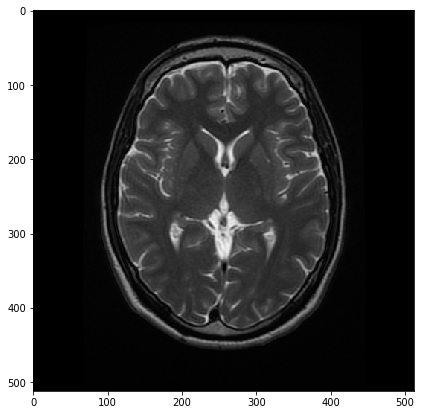

In [13]:
image = cv2.imread('example images/brain_MR.jpg')
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
f = plt.figure(figsize=(18,7))
plt.imshow(image_copy, cmap = 'gray')

If we zoom some places in image a little bit we can see some **noise**.<br>
We can get rid of this noise by applying Gaussian blur. 

First, lets convert an image to **grayscale** and apply function, called **cv2.GaussianBlur()** with params:
- **grayscale** image;
- **filter (kernel) size** - we will use 5x5 filter;
- **standard deviation** - it will be automatically calculate if we set this to 0.<br>

Note, **the bigger the filter size, the larger blur we will make**. But we still need filter size to fit image dimension. 

In [15]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

Now, plot these images side by side. 

Text(0.5, 1.0, 'Blurred image')

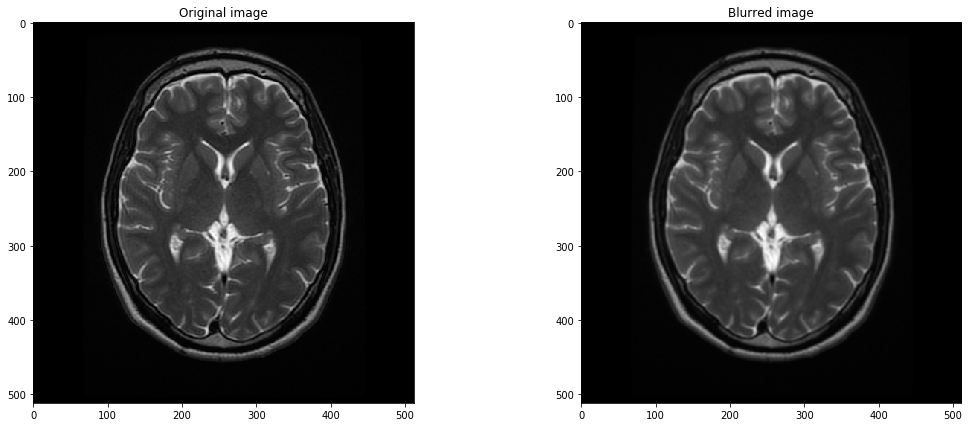

In [22]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (18,7))

ax1.imshow(gray, cmap='gray')
ax1.set_title('Original image')

ax2.imshow(gray_blur, cmap='gray')
ax2.set_title('Blurred image')

If we zoom in, we will observe, that noise is **significantly reduced** on the right image. 

Next let's apply High pass filter for **vertical edge detection** on both original and blurred image to **test their performance**. 

Text(0.5, 1.0, 'High Pass filter: Blurred image')

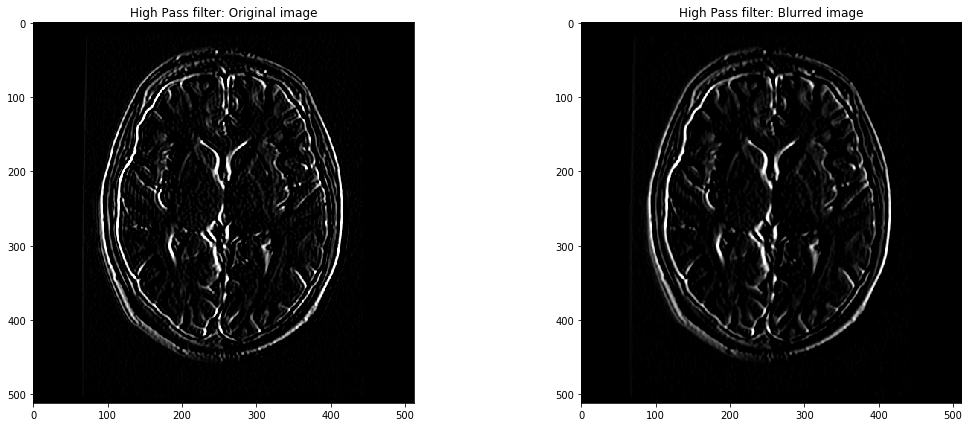

In [23]:
# let's create 3x3 filter 
sobel_x = np.array([[-2,0,2],
                    [-1,0,1],
                    [-2,0,2]])
filter_orig = cv2.filter2D(image_copy, -1, sobel_x)
filter_blur = cv2.filter2D(gray_blur, -1, sobel_x)

f, (ax1, ax2) = plt.subplots(1,2, figsize = (18,7))

ax1.imshow(filter_orig, cmap='gray')
ax1.set_title('High Pass filter: Original image')

ax2.imshow(filter_blur, cmap='gray')
ax2.set_title('High Pass filter: Blurred image')

As we can observe from above images, **blurred image has less noise compared to original** and **detects edges more accurately especially in brain tissue region**, that we mostly care about. 

Finally, lets create a binary image with **threshold to preserve only main edges of blurred image**. 

In [28]:
retval, binary_image = cv2.threshold(filter_blur, 50, 255, cv2.THRESH_BINARY)

Text(0.5, 1.0, 'Binary Filtered Blurred image')

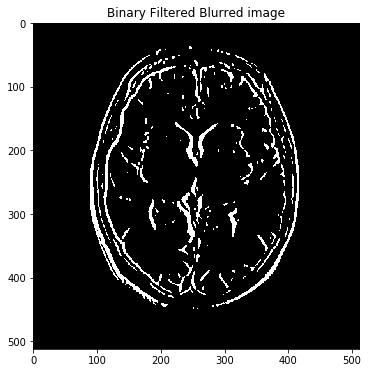

In [30]:
f = plt.figure(figsize = (15,6))
plt.imshow(binary_image, cmap = 'gray')
plt.title('Binary Filtered Blurred image')

**Rule**: in practice we **usually get rid of noise first**, applying Gaussian blur. Then, we detect edges with High pass filtering. <br>
To represent edges more we can convert filtered image into binary. 

Additionally, apply Fourier transformation at original image and filtered image to see how they look like in **frequency domain**.

Text(0.5, 1.0, 'Fourier Transform: Filtered blurred')

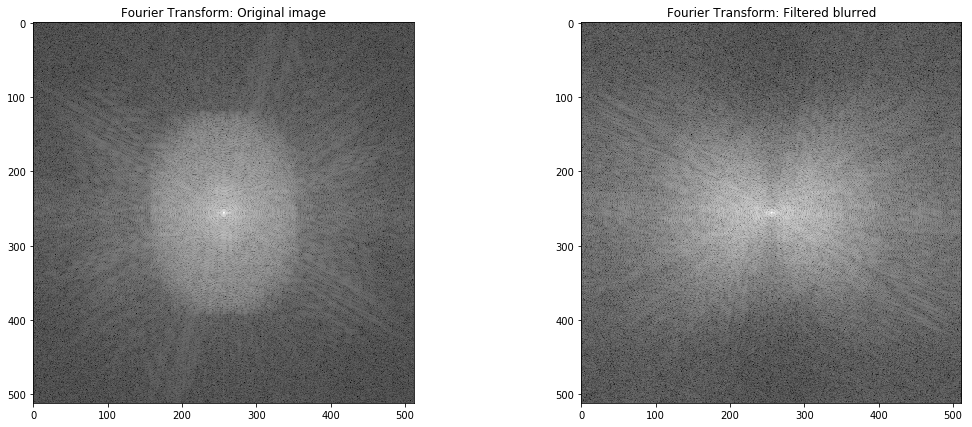

In [35]:
image = cv2.imread('example images/brain_MR.jpg', 0)

f_orig = np.fft.fft2(image)
f_filter = np.fft.fft2(filter_blur)

f_shift_orig = np.fft.fftshift(f_orig)
f_shift_filter = np.fft.fftshift(f_filter)

spectrum_orig = 20*np.log(np.abs(f_shift_orig))
spectrum_filter = 20*np.log(np.abs(f_shift_filter))


f, (ax1, ax2) = plt.subplots(1,2, figsize = (18,7))

ax1.imshow(spectrum_orig, cmap='gray')
ax1.set_title('Fourier Transform: Original image')

ax2.imshow(spectrum_filter, cmap='gray')
ax2.set_title('Fourier Transform: Filtered blurred')